#### Objective

This notebook shows an example of how to:
- Use Welly to load two wells with Vp, Vs, and RHOB curves
- store the wells in Pandas DataFrames, the nconcatenate in a single Pandas DataFrame 
- filter and upscale with Backus average all curves individually, well by well, using Padas groupby 

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
from welly import Project, Well
import matplotlib.pyplot as plt

#### Import well

In [2]:
R39 = Well.from_las('../data/R-39.las')

#### Data clean-up and manipulation

- Make dataframe
- Deal with null values
- Select columns of interest
- Convert slowness to velocity
- Add well name column

Make dataframe

In [3]:
w39_df = R39.df()
w39_df = w39_df[['DT4P', 'DT4S', 'RHOB']]
w39_df.columns = ['DT', 'DTS', 'RHOB']
w39_df.describe(include = 'all')

,DT,DTS,RHOB
count,7843.000000,7843.000000,7843.000000
mean,279.843323,455.340913,2493.556531
std,25.963527,439.113290,114.662210
min,166.347500,-3278.379200,2050.229000
25%,262.778350,461.351100,2450.387250
50%,284.251700,515.766000,2505.075000
75%,299.587350,555.725100,2569.123050
max,348.946300,590.522000,3144.669700


Checking well R-39 for null values

In [4]:
for x in w39_df.columns:
    print (x, w39_df[x].isnull().values.any())
    
print(w39_df.isnull().sum()) # finds how many missing points there are

DT False
DTS False
RHOB False
DT      0
DTS     0
RHOB    0
dtype: int64


There are no null values.

Convert slowness to velocity (usec/m >> m/s)

In [5]:
w39_df['Vp'] = 1.0e6 / w39_df['DT'] 
w39_df['Vs'] = 1.0e6 / w39_df['DTS'] 
w39_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000
mean,279.843323,455.340913,2493.556531,3607.216564,1977.281811
std,25.963527,439.113290,114.662210,367.703324,377.646396
min,166.347500,-3278.379200,2050.229000,2865.770464,-305.028778
25%,262.778350,461.351100,2450.387250,3337.924649,1791.625370
50%,284.251700,515.766000,2505.075000,3518.008863,1932.638279
75%,299.587350,555.725100,2569.123050,3805.488542,2141.848409
max,348.946300,590.522000,3144.669700,6011.512046,3392.929000


Add well name column

In [6]:
w39_df['DEPTH'] = w39_df.index
w39_df['well'] = 'R-39'
w39_df = w39_df.reset_index(drop=True)
w39_df.describe(include = 'all')

,DT,DTS,RHOB,Vp,Vs,DEPTH,well
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843
unique,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,R-39
freq,NaN,NaN,NaN,NaN,NaN,NaN,7843
mean,279.843323,455.340913,2493.556531,3607.216564,1977.281811,2790.596400,NaN
std,25.963527,439.113290,114.662210,367.703324,377.646396,345.067648,NaN
min,166.347500,-3278.379200,2050.229000,2865.770464,-305.028778,2193.036000,NaN
25%,262.778350,461.351100,2450.387250,3337.924649,1791.625370,2491.816200,NaN
50%,284.251700,515.766000,2505.075000,3518.008863,1932.638279,2790.596400,NaN
75%,299.587350,555.725100,2569.123050,3805.488542,2141.848409,3089.376600,NaN


drop slownness columns, sort columns

In [7]:
w39_df.drop(w39_df.columns[[0, 1]], inplace=True, axis=1) 
w39_df = w39_df[['DEPTH', 'Vp', 'Vs', 'RHOB', 'well']]    
w39_df.describe(include = 'all')

,DEPTH,Vp,Vs,RHOB,well
count,7843.000000,7843.000000,7843.000000,7843.000000,7843
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,R-39
freq,NaN,NaN,NaN,NaN,7843
mean,2790.596400,3607.216564,1977.281811,2493.556531,NaN
std,345.067648,367.703324,377.646396,114.662210,NaN
min,2193.036000,2865.770464,-305.028778,2050.229000,NaN
25%,2491.816200,3337.924649,1791.625370,2450.387250,NaN
50%,2790.596400,3518.008863,1932.638279,2505.075000,NaN
75%,3089.376600,3805.488542,2141.848409,2569.123050,NaN


## Work in progress

Despike function from: https://github.com/seg/tutorials-2014/blob/master/1406_Make_a_synthetic/how_to_make_synthetic.ipynb

In [8]:
def despike(curve, curve_sm, max_clip): 
    spikes = np.where(curve - curve_sm > max_clip)[0]
    spukes = np.where(curve_sm - curve > max_clip)[0]
    out = np.copy(curve)
    out[spikes] = curve_sm[spikes] + max_clip  # Clip at the max allowed diff
    out[spukes] = curve_sm[spukes] - max_clip  # Clip at the min allowed diff
    return out

In [9]:
s=w39_df['Vp'].values

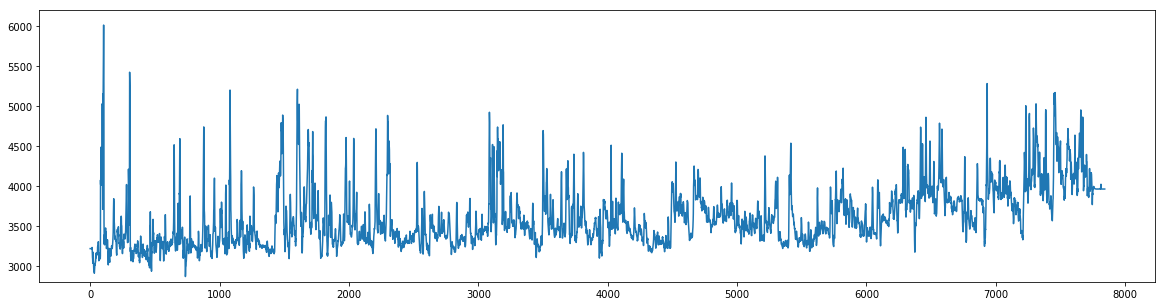

In [10]:
plt.figure(figsize=(20,5)); plt.plot(s); plt.ylim(2800,6200);

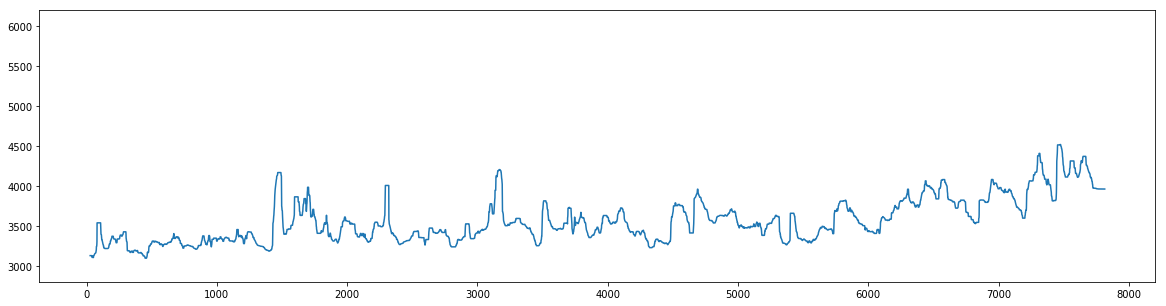

In [11]:
m = pd.Series(s).rolling(window=55, center=True).median()
plt.figure(figsize=(20,5)); plt.plot(m); plt.ylim(2800,6200);

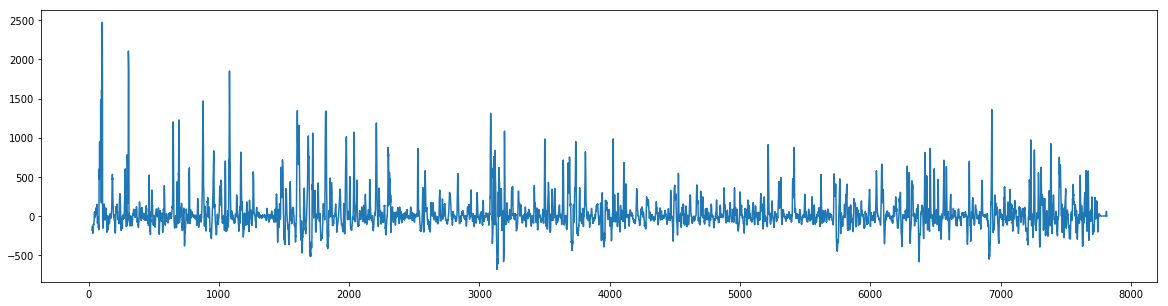

In [12]:
d = s-m
plt.figure(figsize=(20,5)); plt.plot(d);

In [13]:
def error_flag(pred, actual, dev = 1.0):
    """Calculate the difference between a predicted and an actual curve 
    and return a log flagging large differences based on a user-defined distance 
    (in standard deviation units) from the mean difference

    Matteo Niccoli, October 2018
    
    Args:
        predicted (ndarray) = predicted log
        actual (ndarray) =  original log  
        dev  (float) = standard deviations to use, default 1

    Returns:
    flag (ndarray) =  error flag curve
    """   
    flag = np.zeros(len(pred))
    err = np.abs(pred-actual)
    err_mean = np.mean(err)
    err_std = np.std(err)
    flag[np.where(err>(err_mean + (dev*err_std)))] = 1

    return flag

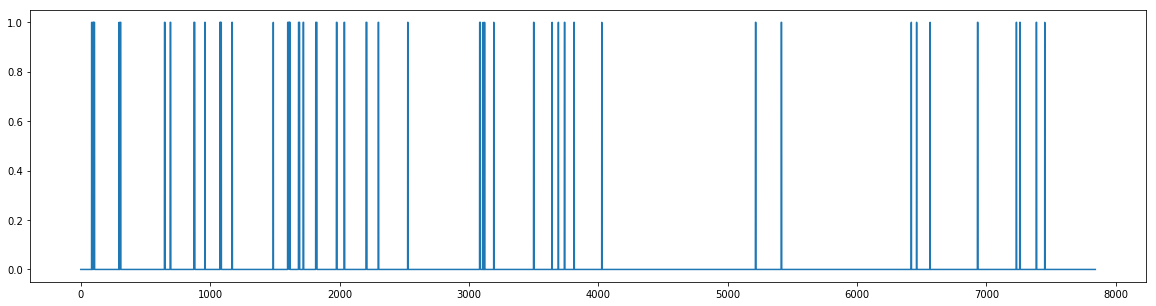

In [14]:
plt.figure(figsize=(20,5)); plt.plot(error_flag(pd.Series(s), m, dev = 3.0));
# ingnore warning: https://github.com/numpy/numpy/issues/8945#issue-221883653

In [15]:
np.where(error_flag(pd.Series(s), m, dev = 3)==1)

(array([  84,   92,   93,   94,   95,   98,   99,  100,  101,  102,  103,
         104,  105,  106,  296,  304,  305,  306,  307,  308,  309,  647,
         648,  649,  650,  651,  691,  692,  693,  694,  695,  874,  875,
         876,  877,  878,  879,  880,  881,  959,  960,  961, 1076, 1078,
        1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1168, 1169, 1170,
        1171, 1488, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607,
        1608, 1609, 1610, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1683,
        1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1719, 1720, 1721,
        1722, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825,
        1976, 1977, 1978, 1979, 1980, 2035, 2036, 2037, 2038, 2039, 2205,
        2206, 2207, 2208, 2209, 2210, 2211, 2299, 2300, 2301, 2302, 2527,
        2528, 2529, 3083, 3084, 3085, 3086, 3087, 3088, 3110, 3121, 3192,
        3193, 3500, 3501, 3502, 3503, 3643, 3691, 3692, 3738, 3739, 3740,
        3741, 3812, 3813, 3814, 4027, 

In [16]:
def despike(s, w, stds):
    """ A rolling type of despike. It calculates rolling median of the input on a long window. Next, it calculates the difference between median and input.
    Finally, it replaces the input with the median if the difference exceeds the mean difference plus a user defined number of standard deviations of the difference"""
    m = pd.Series(s).rolling(window=w, center=True).median()
    flag = np.where(error_flag(pd.Series(s), m, dev = stds)==1)
    out = np.copy(s)
    out[flag] = m.values[flag]
    return out

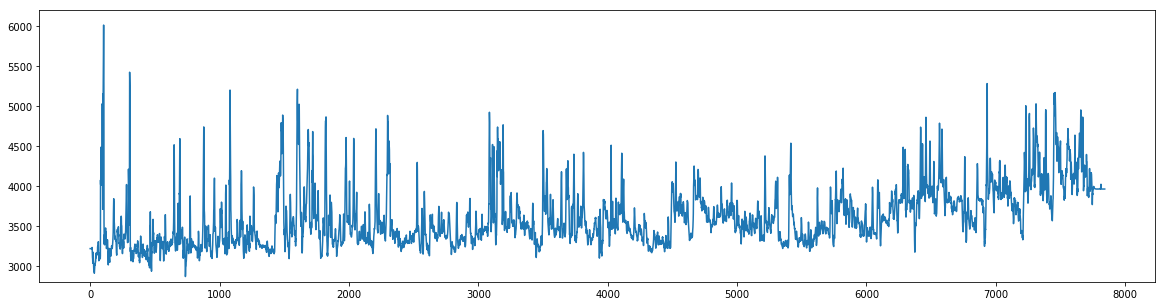

In [17]:
plt.figure(figsize=(20,5)); plt.plot(s);plt.ylim(2800,6200);

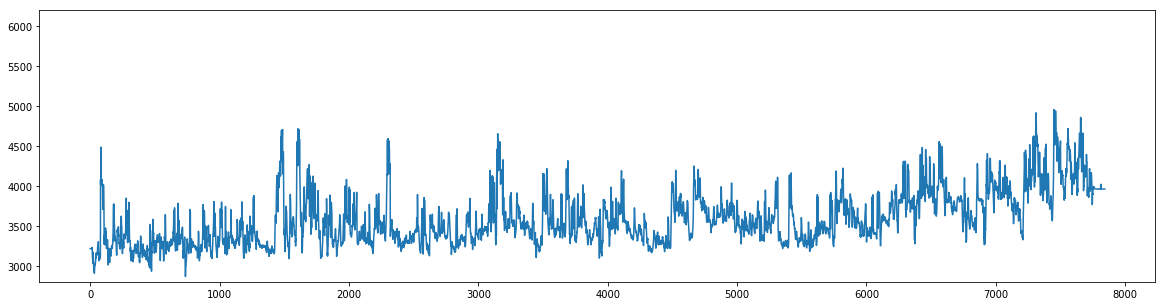

In [18]:
plt.figure(figsize=(20,5)); plt.plot(despike(s, 45, 2)); plt.ylim(2800,6200);